In [38]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Convert to binary classification: 1 if above median, else 0
y = (y > np.mean(y)).astype(int)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
# Experiment: Learning Rate
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
accuracy_lr = []

for lr in learning_rates:
    model = GradientBoostingClassifier(learning_rate=lr, n_estimators=500, random_state=42)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracy_lr.append(accuracy)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy}")


Learning Rate: 0.01, Accuracy: 0.6853932584269663
Learning Rate: 0.05, Accuracy: 0.6966292134831461
Learning Rate: 0.1, Accuracy: 0.7415730337078652
Learning Rate: 0.2, Accuracy: 0.7415730337078652
Learning Rate: 0.5, Accuracy: 0.7528089887640449


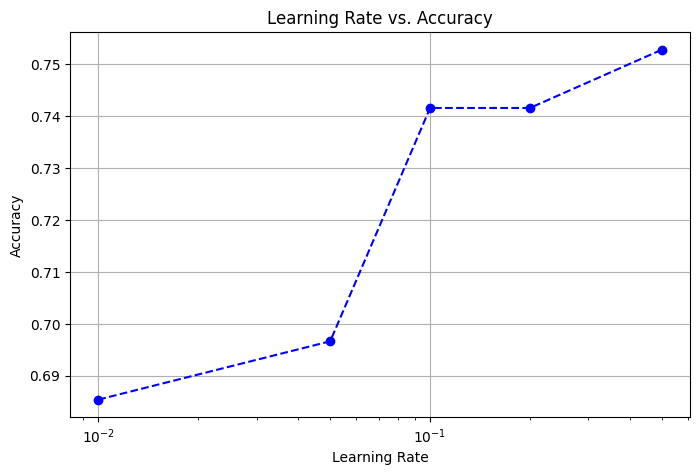

In [40]:
# Plot learning rate vs. accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(learning_rates, accuracy_lr, marker='o', linestyle='--', color='b')
plt.title("Learning Rate vs. Accuracy")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.grid(True)
plt.show()


In [41]:
# Experiment: Number of Estimators
n_estimators = [50, 100, 500, 1000]
accuracy_estimators = []

for n in n_estimators:
    model = GradientBoostingClassifier(learning_rate=0.5, n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test))
    accuracy_estimators.append(accuracy)
    print(f"Number of Estimators: {n}, Accuracy: {accuracy}")


Number of Estimators: 50, Accuracy: 0.7078651685393258
Number of Estimators: 100, Accuracy: 0.7191011235955056
Number of Estimators: 500, Accuracy: 0.7528089887640449
Number of Estimators: 1000, Accuracy: 0.7528089887640449


In [43]:
# Experiment: Combined Learning Rate and Estimators
results = []
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators_list = [50, 100, 200, 500]

for lr in learning_rates:
    for n in n_estimators_list:
        model = GradientBoostingClassifier(learning_rate=lr, n_estimators=n, random_state=42)
        model.fit(X_train, y_train)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        results.append({'Learning Rate': lr, 'Estimators': n, 'Accuracy': accuracy})
        print(f"Learning Rate: {lr}, Estimators: {n}, Accuracy: {accuracy}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results)




Learning Rate: 0.01, Estimators: 50, Accuracy: 0.6741573033707865
Learning Rate: 0.01, Estimators: 100, Accuracy: 0.6853932584269663
Learning Rate: 0.01, Estimators: 200, Accuracy: 0.7415730337078652
Learning Rate: 0.01, Estimators: 500, Accuracy: 0.6853932584269663
Learning Rate: 0.05, Estimators: 50, Accuracy: 0.7303370786516854
Learning Rate: 0.05, Estimators: 100, Accuracy: 0.6853932584269663
Learning Rate: 0.05, Estimators: 200, Accuracy: 0.6966292134831461
Learning Rate: 0.05, Estimators: 500, Accuracy: 0.6966292134831461
Learning Rate: 0.1, Estimators: 50, Accuracy: 0.6966292134831461
Learning Rate: 0.1, Estimators: 100, Accuracy: 0.6966292134831461
Learning Rate: 0.1, Estimators: 200, Accuracy: 0.6966292134831461
Learning Rate: 0.1, Estimators: 500, Accuracy: 0.7415730337078652
Learning Rate: 0.2, Estimators: 50, Accuracy: 0.6853932584269663
Learning Rate: 0.2, Estimators: 100, Accuracy: 0.7191011235955056
Learning Rate: 0.2, Estimators: 200, Accuracy: 0.7415730337078652
Learni

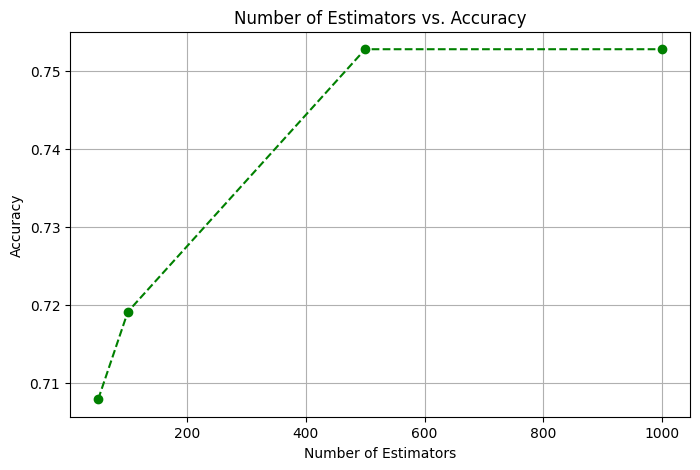

In [44]:
# Plot number of estimators vs. accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, accuracy_estimators, marker='o', linestyle='--', color='g')
plt.title("Number of Estimators vs. Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


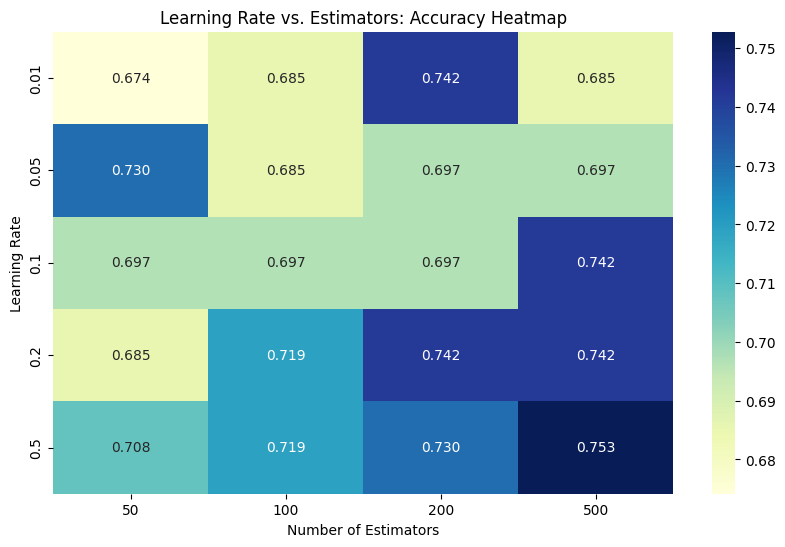

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of results
pivot_table = results_df.pivot(index="Learning Rate", columns="Estimators", values="Accuracy")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Learning Rate vs. Estimators: Accuracy Heatmap")
plt.xlabel("Number of Estimators")
plt.ylabel("Learning Rate")
plt.show()
